# Training the Critic (Discriminator) in WGAN

In a Wasserstein GAN (WGAN), the discriminator (called the critic) evaluates the "realness" of data points without using a sigmoid activation function. The loss function is based on the Wasserstein distance (Earth-Mover's distance), which provides a meaningful measure of distance between the real and generated data distributions.

Let's go through the training of the critic (discriminator) in a WGAN using real images $\{r1, r2, r3\}$ and fake images $\{f1, f2, f3\}$ step by step.

## Step-by-Step Explanation

### 1. Forward Pass for Real Images

- **Input Real Images**: Pass the real images $\{r1, r2, r3\}$ through the critic.
- **Critic Output for Real Images**: Get the critic's scores $\{C(r1), C(r2), C(r3)\}$, where $C(r_i)$ is the critic's output for the real image $r_i$.

### 2. Forward Pass for Fake Images

- **Generate Fake Images**: Use the generator to produce fake images $\{f1, f2, f3\}$ from random noise vectors $\{z1, z2, z3\}$.
- **Input Fake Images**: Pass the fake images through the critic.
- **Critic Output for Fake Images**: Get the critic's scores $\{C(f1), C(f2), C(f3)\}$, where $C(f_i)$ is the critic's output for the fake image $f_i$.

### 3. Loss Computation

- **Critic Loss**: The critic aims to maximize the Wasserstein distance, which in practice is done by minimizing the negative of this distance.
- **Real Loss**: Average score of the real images:
  $$
  L_{\text{real}} = -\frac{1}{3} \sum_{i=1}^{3} C(r_i)
  $$
- **Fake Loss**: Average score of the fake images:
  $$
  L_{\text{fake}} = \frac{1}{3} \sum_{i=1}^{3} C(f_i)
  $$
- **Total Critic Loss**: Combine the real and fake losses:
  $$
  L_C = L_{\text{real}} + L_{\text{fake}} = -\frac{1}{3} \sum_{i=1}^{3} C(r_i) + \frac{1}{3} \sum_{i=1}^{3} C(f_i)
  $$

### 4. Backpropagation and Weight Updates

- **Compute Gradients**: Backpropagate the loss $L_C$ to compute the gradients with respect to the critic's weights.
- **Update Weights**: Use an optimizer (e.g., RMSProp or Adam) to update the critic's weights based on the computed gradients. This step minimizes the critic's loss $L_C$, thereby maximizing the Wasserstein distance.

## Detailed Explanation

### Forward Pass for Real Images

1. **Input Real Images**:
   - We have a batch of real images $\{r1, r2, r3\}$.

2. **Critic Output for Real Images**:
   - Pass each real image $r_i$ through the critic.
   - Obtain the critic's output $C(r_i)$, which is a scalar value indicating the "realness" score of the image.

### Forward Pass for Fake Images

1. **Generate Fake Images**:
   - Generate fake images using the generator from random noise vectors $\{z1, z2, z3\}$.
   - The generated fake images are $\{f1, f2, f3\} = G(\{z1, z2, z3\})$.

2. **Critic Output for Fake Images**:
   - Pass each fake image $f_i$ through the critic.
   - Obtain the critic's output $C(f_i)$, which is a scalar value indicating the "realness" score of the image.

### Loss Computation

1. **Real Loss**:
   - Calculate the average critic score for real images:
     $$
     L_{\text{real}} = -\frac{1}{3} \sum_{i=1}^{3} C(r_i)
     $$

2. **Fake Loss**:
   - Calculate the average critic score for fake images:
     $$
     L_{\text{fake}} = \frac{1}{3} \sum_{i=1}^{3} C(f_i)
     $$

3. **Total Critic Loss**:
   - Combine the real and fake losses:
     $$
     L_C = L_{\text{real}} + L_{\text{fake}} = -\frac{1}{3} \sum_{i=1}^{3} C(r_i) + \frac{1}{3} \sum_{i=1}^{3} C(f_i)
     $$

### Backpropagation and Weight Updates

1. **Compute Gradients**:
   - Backpropagate the total critic loss $L_C$ to compute the gradients with respect to the critic's weights.

2. **Update Weights**:
   - Use an optimizer to update the critic's weights based on the computed gradients.
   - This step minimizes the critic's loss $L_C$, effectively maximizing the Wasserstein distance between real and fake distributions.

#------------------------------------------------------------------------

# Training the Generator in WGAN

In a Wasserstein GAN (WGAN), the generator aims to create fake images that the critic (discriminator) evaluates as real. The objective is to improve the generator such that the generated images are indistinguishable from real images by the critic.

Let's go through the training of the generator in a WGAN using real images $\{r1, r2, r3\}$ and fake images $\{f1, f2, f3\}$ step by step.

## Step-by-Step Explanation

### 1. Generate Fake Images

- **Input Noise**: Generate a batch of random noise vectors $\{z1, z2, z3\}$.
- **Generate Fake Images**: Pass the noise through the generator to produce fake images $\{f1, f2, f3\} = G(\{z1, z2, z3\})$.

### 2. Forward Pass Through Critic

- **Input Fake Images**: Pass the generated fake images through the critic.
- **Critic Output for Fake Images**: Get the critic's scores $\{C(f1), C(f2), C(f3)\}$, where $C(f_i)$ is the critic's output for the fake image $f_i$.

### 3. Loss Computation

- **Generator Loss**: The generator aims to minimize the critic's ability to distinguish fake images from real ones, which in practice means maximizing the critic's score for fake images. This can be achieved by minimizing the negative of the critic's score.
- **Compute Generator Loss**:
  $$
  L_G = -\frac{1}{3} \sum_{i=1}^{3} C(f_i)
  $$

### 4. Backpropagation and Weight Updates

- **Compute Gradients**: Backpropagate the loss $L_G$ to compute the gradients with respect to the generator's weights.
- **Update Weights**: Use an optimizer (e.g., RMSProp or Adam) to update the generator's weights based on the computed gradients. This step minimizes the generator's loss $L_G$, thereby improving the quality of generated images.

## Detailed Explanation

### Generate Fake Images

1. **Input Noise**:
   - Generate a batch of random noise vectors $\{z1, z2, z3\}$.

2. **Generate Fake Images**:
   - Pass the noise vectors through the generator to produce fake images $\{f1, f2, f3\}$.

### Forward Pass Through Critic

1. **Input Fake Images**:
   - Pass each fake image $f_i$ through the critic.

2. **Critic Output for Fake Images**:
   - Obtain the critic's output $C(f_i)$, which is a scalar value indicating the "realness" score of the image.

### Loss Computation

1. **Generator Loss**:
   - Calculate the average critic score for fake images, but negate it because we want to maximize this score:
     $$
     L_G = -\frac{1}{3} \sum_{i=1}^{3} C(f_i)
     $$

### Backpropagation and Weight Updates

1. **Compute Gradients**:
   - Backpropagate the generator's loss $L_G$ to compute the gradients with respect to the generator's weights.

2. **Update Weights**:
   - Use an optimizer to update the generator's weights based on the computed gradients.
   - This step minimizes the generator's loss $L_G$, effectively improving the quality of generated images to fool the critic.

# ------------------------------------------------------------------------

# Simple Neural Network Architecture for Cricket Score Prediction

## Introduction

In this example, we will define a simple neural network architecture for predicting cricket scores using Keras (TensorFlow) in Python. The network will take in features such as the number of overs bowled, wickets lost, and other relevant match statistics, and output the predicted score.

## Neural Network Architecture

We will use a simple feedforward neural network with the following layers:
1. Input Layer: Takes the features as input.
2. Hidden Layer 1: Dense layer with ReLU activation.
3. Hidden Layer 2: Dense layer with ReLU activation.
4. Output Layer: Dense layer with a single neuron for the predicted score.

## Implementation

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Input Layer
# Assuming we have 10 input features (e.g., overs, wickets, etc.)
model.add(Dense(units=32, input_dim=10, activation='relu'))

# Hidden Layer 1
model.add(Dense(units=64, activation='relu'))

# Hidden Layer 2
model.add(Dense(units=32, activation='relu'))

# Output Layer
# Single output neuron for the predicted score
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()



# Clipping the Critic Scores in WGAN

## Introduction

In a Wasserstein GAN (WGAN), the discriminator is referred to as the critic. The critic evaluates the "realness" of data points and provides a score that helps to compute the Wasserstein distance between the real and generated data distributions. One of the key techniques used in training WGANs is weight clipping of the critic. This technique helps ensure the Lipschitz continuity condition required for the Wasserstein distance calculation.

## Why Clip the Critic Scores?

The Wasserstein distance requires the critic to be a 1-Lipschitz function. This means the critic's output should not change too rapidly in response to small changes in the input. Enforcing the Lipschitz constraint is crucial for the stability and meaningfulness of the Wasserstein distance.

### How Clipping Ensures Lipschitz Continuity

By clipping the weights of the critic to a small range, we indirectly enforce the Lipschitz constraint. Weight clipping ensures that the critic's function does not have excessively steep gradients, thereby satisfying the 1-Lipschitz condition.

## Implementation of Weight Clipping

Weight clipping involves constraining the critic's weights to a fixed range (e.g., between -0.01 and 0.01) after each gradient update. This is typically done in the training loop.

## Example Code for Weight Clipping

Below is an example of how to implement weight clipping in the training loop of a WGAN using TensorFlow and Keras.

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

# Define the critic model
critic = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output a single value (critic score)
])

# Compile the critic
critic.compile(optimizer=RMSprop(learning_rate=0.00005), loss='mean_squared_error')

# Weight clipping parameters
clip_value = 0.01

# Training loop with weight clipping
epochs = 10000
batch_size = 64

for epoch in range(epochs):
    # Get a batch of real images and a batch of fake images
    real_images = ...  # Load or generate real images
    noise = tf.random.normal([batch_size, 100])
    fake_images = generator(noise)
    
    # Train the critic on real and fake images
    with tf.GradientTape() as tape:
        real_output = critic(real_images, training=True)
        fake_output = critic(fake_images, training=True)
        critic_loss = tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)
    
    grads = tape.gradient(critic_loss, critic.trainable_variables)
    critic.optimizer.apply_gradients(zip(grads, critic.trainable_variables))
    
    # Clip the weights of the critic
    for layer in critic.layers:
        if isinstance(layer, Dense):
            weights = layer.get_weights()
            weights = [tf.clip_by_value(w, -clip_value, clip_value) for w in weights]
            layer.set_weights(weights)
    
    # Print the critic loss for monitoring
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Critic Loss: {critic_loss.numpy()}")

# Summary of the critic model
critic.summary()


## Table of Contents

### 1. Data Loading and Preprocessing
> #### 1.1 Load the Data
> #### 1.2 Define custom dataset and dataloader
> #### 1.3 Data Exploration
### 2. Image Generation using simple GANs
> #### 2.1 Define model architecture
> #### 2.2 Train the model
> #### 2.3 Generate random images


---

#### 1.1 Load the Data

In [ ]:
# Upload data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get images
!unzip '/content/drive/MyDrive/images_dtd-200713-114828.zip'

In [ ]:
# print number of images in the dataset
!ls -l images_dtd | grep ".jpg" | wc -l

2500


In [ ]:
# import libraries and modules
%matplotlib inline

import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# import pytorch related modules
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, ToTensor, Resize, RandomCrop, Grayscale, Normalize

from torch.optim import Adam

from torch.nn import Sequential
from torch.nn import Linear, LeakyReLU, BatchNorm1d, Sigmoid, Tanh, Flatten, BCELoss

In [ ]:
# set seed
seed = 42
np.random.seed(seed)
torch.manual_seed(seed);

In [ ]:
images_dir = "/content/images_dtd"

#### 1.2 Define custom dataset and dataloader

In [ ]:
# define custom dataset class
class TextureDataset(Dataset):
    def __init__(self, images_dir):

        # get image names of images which are chequered
        self.image_names = []
        for image in os.listdir(images_dir):
            if image.split('_')[0] == "chequered":
                self.image_names.append(image)

        # get image paths
        self.images_paths = []
        for image_name in self.image_names:
            self.images_paths.append(os.path.join(images_dir, image_name))

    def __getitem__(self, idx):

        # read data
        image = Image.open(self.images_paths[idx])

        # apply data augmentation
        transform = Compose([
                    Grayscale(),
                    Resize(80),
                    RandomCrop(64),
                    ToTensor(),
                    Normalize([0.5], [0.5])
                    ])

        image = transform(image)

        return image

    def __len__(self):
        return len(self.image_names)

In [ ]:
# create instance of custom dataset
dataset = TextureDataset(images_dir)

# create dataloader
data_loader = DataLoader(
    dataset,
    batch_size=16,
    num_workers=4,
    shuffle=True
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


#### 1.3 Data Exploration

In [ ]:
# check for one iteration of loop
for batch_x in data_loader:
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# get shapes of batches
batch_x.shape

torch.Size([16, 1, 64, 64])

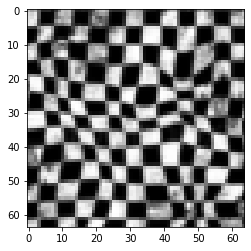

In [ ]:
# print image
plt.imshow(batch_x[0].squeeze(), cmap='gray')

In [ ]:
batch_x.min(), batch_x.max()

(tensor(-1.), tensor(1.))

### 2. Image Generation using simple GANs

#### 2.1 Define model architecture

In [ ]:
# define discriminator model architecture

# Input
# Dense(num_neurons=128, activation='leaky_relu')
# Dense(num_neurons=64, activation='leaky_relu')
# Dense(num_neurons=1, activation='sigmoid')

discriminator = Sequential(
    Linear(64*64*1, 128),
    LeakyReLU(0.2),
    Linear(128, 64),
    LeakyReLU(0.2),
    Linear(64, 1),
    Sigmoid()
)

In [ ]:
# print model
discriminator

Sequential(
  (0): Linear(in_features=4096, out_features=128, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=64, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
# check model on one image
output = discriminator(batch_x[:1].view(1, -1)).detach().numpy()

In [ ]:
output

array([[0.48991403]], dtype=float32)

In [ ]:
# define generator model architecture

# Input
# Dense(num_neurons=64, activation='leaky_relu')
# Dense(num_neurons=128, activation='leaky_relu')
# Dense(num_neurons=64*64, activation='tanh')

generator = Sequential(
    Linear(100, 64),
    LeakyReLU(0.2),
    Linear(64, 128),
    BatchNorm1d(128),
    LeakyReLU(0.2),
    Linear(128, 64*64*1),
    Tanh()
)

In [ ]:
generator

Sequential(
  (0): Linear(in_features=100, out_features=64, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=64, out_features=128, bias=True)
  (3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): LeakyReLU(negative_slope=0.2)
  (5): Linear(in_features=128, out_features=4096, bias=True)
  (6): Tanh()
)

In [ ]:
# check model on one image
generator.eval()
output = generator(torch.randn(1, 100)).detach().numpy()

In [ ]:
output.shape

(1, 4096)

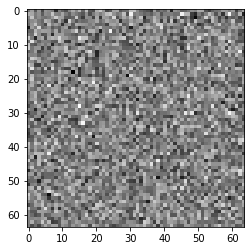

In [ ]:
plt.imshow(output.reshape(64, 64), cmap='gray')

#### 2.2 Train the model

In [ ]:
discriminator = discriminator.to('cuda')
generator = generator.to('cuda')

In [ ]:
# Initialize BCELoss function
criterion = BCELoss()

# Establish convention for real and fake labels during training
real_label = 1
fake_label = 0

# fixed noise for plotting
fixed_noise = torch.randn(1, 100)

# number of epochs
num_epochs = 200

# Setup Adam optimizers for both G and D
optimizerD = Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [ ]:
num_epochs=200

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training loss for epoch 10 is 1.05326 for disciminator and 0.84806 for generator
Training loss for epoch 20 is 0.84476 for disciminator and 1.30459 for generator
Training loss for epoch 30 is 0.57231 for disciminator and 1.94190 for generator
Training loss for epoch 40 is 0.53715 for disciminator and 2.03661 for generator
Training loss for epoch 50 is 0.63490 for disciminator and 2.05837 for generator

Generated Image


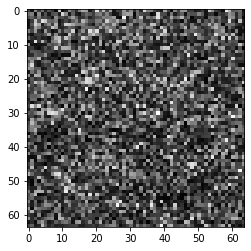

Training loss for epoch 60 is 0.51585 for disciminator and 2.23594 for generator
Training loss for epoch 70 is 0.45624 for disciminator and 2.28257 for generator
Training loss for epoch 80 is 0.60148 for disciminator and 2.57214 for generator
Training loss for epoch 90 is 0.66566 for disciminator and 1.86946 for generator
Training loss for epoch 100 is 0.58012 for disciminator and 1.83381 for generator

Generated Image


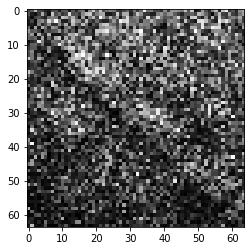

Training loss for epoch 110 is 0.75835 for disciminator and 1.95556 for generator
Training loss for epoch 120 is 0.78772 for disciminator and 1.83200 for generator
Training loss for epoch 130 is 0.86230 for disciminator and 1.70510 for generator
Training loss for epoch 140 is 0.88422 for disciminator and 1.78890 for generator
Training loss for epoch 150 is 0.69175 for disciminator and 1.64394 for generator

Generated Image


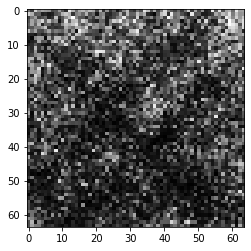

Training loss for epoch 160 is 0.85597 for disciminator and 1.49101 for generator
Training loss for epoch 170 is 0.79001 for disciminator and 1.52196 for generator
Training loss for epoch 180 is 0.80414 for disciminator and 1.57762 for generator
Training loss for epoch 190 is 0.83118 for disciminator and 1.70257 for generator
Training loss for epoch 200 is 1.00906 for disciminator and 1.66183 for generator

Generated Image


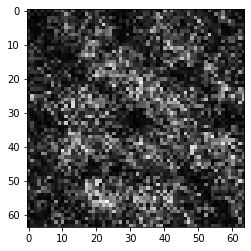

In [ ]:
# set model to train
discriminator.train()
generator.train()

# train model
for epoch in range(num_epochs):

    # initialize variables
    epochG_loss = epochD_loss = cnt = 0

    # loop through the data
    for i, batch_x in enumerate(data_loader):
        ## train discriminator

        # get real images and targets and transfer them to GPU
        batch_x = batch_x.to("cuda").float()

        batch_size = batch_x.shape[0]

        batch_y = torch.full((batch_size,), real_label, device="cuda")

        # clear gradients
        discriminator.zero_grad()

        # pass real images to discriminator model
        outputs = discriminator(batch_x.view(batch_size, -1)).view(-1)

        # get loss
        errD_real = criterion(outputs, batch_y.float())

        # do a backward pass
        errD_real.backward()

        # get fake images and targets and transfer them to GPU
        generated_images = generator(torch.randn(batch_size, 100, device="cuda"))

        batch_y = torch.full((batch_size,), fake_label, device="cuda")

        # pass fake images to discriminator model
        outputs = discriminator(generated_images.detach()).view(-1)

        # get loss
        errD_fake = criterion(outputs, batch_y.float())

        # do a backward pass
        errD_fake.backward()

        # update gradients
        optimizerD.step()

        ## train generator

        # clear gradients
        generator.zero_grad()

        # get real targets and transfer them to GPU
        batch_y = torch.full((batch_size,), real_label, device="cuda")

        # pass fake images to discriminator model
        outputs = discriminator(generated_images).view(-1)

        # get loss
        errG = criterion(outputs, batch_y.float())

        # do a backward pass
        errG.backward()

        # add loss
        errD = errD_real + errD_fake

        # update gradients
        optimizerG.step()

        # sum loss and get count
        epochD_loss += errD.item()
        epochG_loss += errG.item()
        cnt += 1

    # take average loss for all batches
    epochD_loss /= cnt
    epochG_loss /= cnt

    # print loss and generate image
    if (epoch + 1) % 10 == 0:
        print("Training loss for epoch {} is {:.5f} for disciminator and {:.5f} for generator".format(epoch + 1, epochD_loss, epochG_loss))
    if (epoch + 1) % 50 == 0:
        print('\nGenerated Image')

        # get prediction
        generator.eval()
        with torch.no_grad():
            output = generator(fixed_noise.to('cuda')).detach().cpu().numpy()

        # plot generated image
        plt.imshow(output.reshape(64, 64), cmap='gray')
        plt.show()

        # revert back to training
        generator.train()

#### 2.3 Generate random images

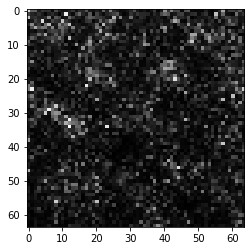

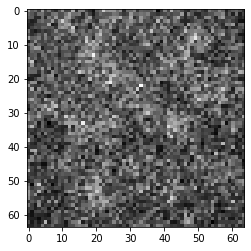

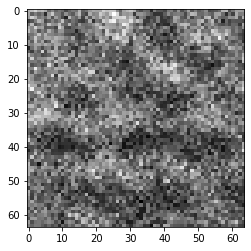

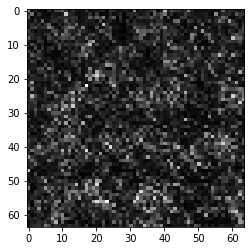

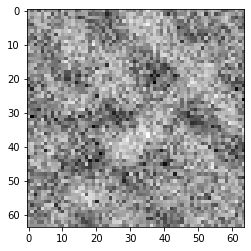

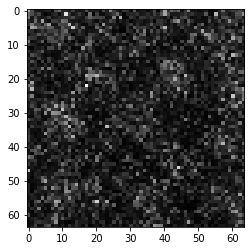

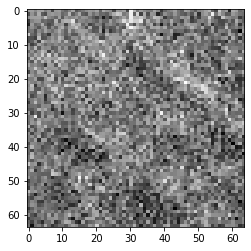

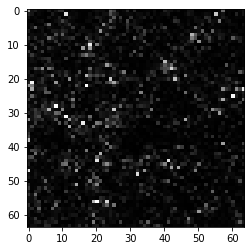

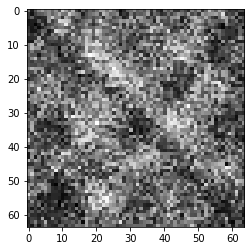

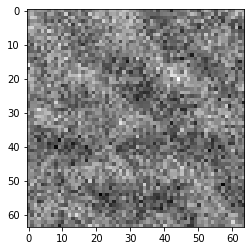

In [ ]:
# generate ten random images
generator.eval()

generated_images = generator(torch.randn(10, 100).to('cuda')).detach().cpu().numpy()

for image in generated_images:
    plt.imshow(image.reshape(64, 64), cmap='gray')
    plt.show()

In [ ]:
generated_images.min(), generated_images.mean(), generated_images.max()

(-0.9997633, -0.34668016, 0.90662783)